#  Γεννητικά Ανταγωνιστικά Δίκτυα (ΓΑΔ) - Generative Adversarial Networks (GAN)

Όπως είπαμε και στη διάλεξη, τα Γεννητικά Ανταγωνιστικά Δίκτυα (ΓΑΔ) - Generative Adversarial Networks (GAN) είναι ένα  γεννητικό (generative) σύστημα μηχανικής μάθησης το οποίο [προτάθηκε  από τον Goodfellow το 2014](https://arxiv.org/abs/1406.2661), και αποτελείται από δύο διακριτά νευρωνικά δίκτυα:
1. Τον γεννήτορα (generator), ο οποίος προσπαθεί να δημιουργήσει νέα δείγματα δεδομένων, όμοια προς τα υπάρχοντα
2. Τον διευκρινιστή (discriminator), ο οποίος καλείται να αναγνωρίσει αν ένα δείγμα δεδομένων είναι "αληθινό" ή "ψεύτικο"

Η είσοδος του δικτύου του γεννήτορα είναι μια σειρά τυχαίων αριθμών (θορύβου), τα οποία καλούνται λανθάνοντα δείγματα (latent samples). Όπως είπαμε και παραπάνω, ο γεννήτορας  προσπαθεί να δημιουργήσει δείγματα, τα οποία τελικά προέρχονται από την επιθυμητή κατανομή των δεδομένων. Ο θόρυβος που λαμβάνει στην είσοδό του διέρχεται μέσω των διαφορίσημων συναρτήσεων ενεργοποίησης του δικτύου και μετασχηματίζεται, μέσω της εκπαίδευσης, με τέτοιο τρόπο έτσι ώστε στην έξοδό του να παράξει "ρεαλιστικά δεδομένα". Άρα, στη συγκεκριμένη περίπτωση, ο ρόλος της εισόδου είναι η εισαγωγή τυχαιότητας στο σύστημα, η οποία επιτρέπει στον γεννήτορα να παράξει εξόδους που θα καλύπτουν όλο το εύρος των υπό εξέταση δεδομένων.

Το δίκτυο του διευκρινιστή από την άλλη αποτελείται από έναν ταξινομητή, ο οποίος εκπαιδεύεται μέσω επιβλεπόμενης μάθησης σε ένα dataset και μαθαίνει να αναγνωρίζει αν η έξοδος που παράγει ο γεννήτορας ανταποκρίνεται στα δεδομένα στα οποία έχει εκπαιδευτεί ο διευκρινιστής ή όχι.

Η εκπαίδευση ενός GAN προσομοιάζει με ένα παιχνίδι minmax. Ο γεννήτορας προσπαθεί να μάθει να δημιουργεί δεδομένα με τέτοιο τρόπο που ο διευκρινιστής δε θα μπορεί πλέον να αναγνωρίζει αν είναι ψεύτικα ή όχι. Ο ανταγωνισμός αυτός μεταξύ των δύο δικτύων βελτιώνει τη δυνατότητα μάθησης του συνολικού δικτύου, μέχρις ότου ο γεννήτορας μάθει να δημιουργεί "ρεαλιστικά" δεδομένα.

Στο συγκεκριμένο notebook θα δούμε πως μπορούμε να χρησιμοποιήσουμε τα GANs για την παραγωγή εικόνων ψηφιών, παρόμοιων με αυτά που υπάρχουν στο γνωστό μας [MNIST dataset](http://yann.lecun.com/exdb/mnist/).

Για την ταχύτερη εκτέλεση του κώδικα, στην περίπτωση που χρησιμοποιείτε Google Colaboratory, συστήνεται να επιλέξετε τις κάρτες γραφικών ως τον επιταχυντή υλικού (hardware accelerator). Αυτό επιτυγχάνεται επιλέγοντας το μενού Runtime και στη συνέχεια το υπομενού Change Runtime type. Στο νέο παράθυρο που θα εμφανιστεί επιλέγουμε GPU στο hardware accelerator και κατόπιν Save.

Η εκπαίδευση των GANs στα κελιά που θα ακολουθήσουν θα χρειαστεί κάποιο χρόνο, οπότε ενδέχεται να εμφανιστεί παράθυρο σφάλματος με τίτλο “Runtime disconnected” και μήνυμα “The connection to the runtime has timed out”. Σε αυτή την περίπτωση πατάμε “Reconnect” και συνδεόμαστε ξανά με το περιβάλλον εκτέλεση του κώδικα.

## Βιβλιοθήκες

Ενημερώνουμε τις βασικές βιβλιοθήκες που πρόκειται να χρησιμοποιήσουμε (keras, tensorflow) στις τελευταίες τους εκδόσεις

In [0]:
!pip install --upgrade keras
!pip install --upgrade tensorflow

Ξεκινάμε εισάγοντας τις βιβλιοθήκες που πρόκειται να χρησιμοποιήσουμε (κυρίως το *keras* και δευτερευόντως το *scikit-learn,* το *numpy* και το *matplotlib*)

In [1]:
from keras import backend as K
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import BatchNormalization, Conv2D, Conv2DTranspose, Dense, Flatten, Input, LeakyReLU, ReLU, Reshape
from keras.optimizers import Adam, RMSprop
from keras.initializers import RandomNormal
from sklearn.preprocessing import MinMaxScaler

import numpy as np
import matplotlib.pyplot as plt

# set the random seed to a predefined value for the reproducibility 
# of the experiments
np.random.seed(2019)
%matplotlib inline

Using TensorFlow backend.


### Dataset

Αρχικά φορτώνουμε το MNIST Dataset από το keras

In [2]:
# load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


Ας δούμε μια χαρακτηριστική εικόνα (ψηφίο) για την κάθε ετικέτα

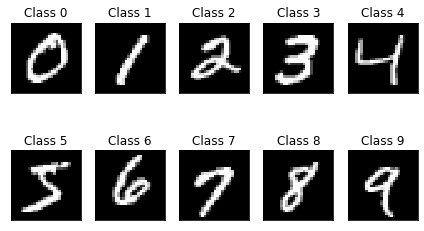

In [3]:
fig = plt.figure()
for i in range(10):
    plt.subplot(2, 5, i+1)
    x_y = X_train[y_train == i]
    plt.imshow(x_y[0], cmap='gray', interpolation='none')
    plt.title("Class %d" % (i))
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()



Μετασχηματίζουμε τις εικόνες από πίνακα $28\times28$ pixels σε να διάνυσμα $784$ χαρακτηριστικών. Επίσης του αλλάζουμε κλίματα, απεικονίζοντάς τες γραμμικά από το $[0, 255]$ στο $[0,1]$ με την χρήση του [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) του scikit-learn

In [4]:
print('X_train shape', X_train.shape)

# reshaping the inputs
X_train = X_train.reshape(60000, 28*28)
# normalizing the inputs
scaler = MinMaxScaler(feature_range=(0,1))

X_train_scaled = scaler.fit_transform(X_train)

print('X_train_scaled shape:', X_train_scaled.shape)

X_train shape (60000, 28, 28)
X_train_scaled shape: (60000, 784)


## Simple GAN

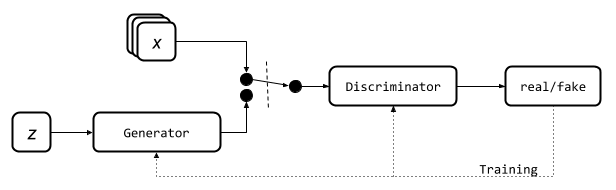

Η αντικειμενική συνάρτηση που προσπαθεί να βελτιστοποιήσει το απλό GAN εναι η παρακάτω:

 $ \underset{\theta_{g}}{min} \: \underset{\theta_{d}}{max} V(D,G) = \mathbb{E}_{x\sim p_{data}(x)} [log D_{\theta_{d}}(x)] + \mathbb{E}_{z\sim p_{z}(z)}[log(1 - D_{\theta_{d}}(G_{\theta_{g}}(z)))]$
 

*  Ο διευκρινιστής $D$ θέλει να μεγιστοποιήσει την αντικειμενική συνάρτηση όσον αφορά τις παραμέτρους του ($\theta_d$), έτσι ώστε το $D(x)$ να είναι κατά το δυνατόν εγγύτερα στο $1$ (αληθινά δεδομένα) και το $D(G(z))$ κοντά στο $0$ (ψευδή δεδομένα)
*  Ο γεννήτορας $G$ θέλει να ελαχιστοποιήσει την αντικειμενική συνάρτηση όσον αφορά τις παραμέτρους του ($\theta_g$), έτσι ώστε το $D(G(z))$ να είναι εγγύτερα στο $1$

Ξεκινάμε ορίζοντας το μέγεθος του χώρου των λανθανουσών μεταβλητών $z$, ο οποίος πρόκειται να είναι ένα διάνυσμα μεγέθους $100$ χαρακτηριστικών 

In [0]:
# latent space dimension
latent_dim = 100

# image dimension 28x28
img_dim = 28*28


Το δίκτυο του γεννήτορα είναι ένα πλήρως διασυνδεδεμένο βαθύ δίκτυο $3$ κρυφών επιπέδων, μεγέθους $128, 256$ και $512$ νευρώνων αντίστοιχα.

In [6]:
# Generator network
generator = Sequential([
    # Input layer and hidden layer 1
    Dense(128, input_shape=(latent_dim,), 
          kernel_initializer=RandomNormal(stddev=0.02)),
    LeakyReLU(alpha=0.2),
    BatchNormalization(momentum=0.8),
    
    # Hidden layer 2
    Dense(256),
    LeakyReLU(alpha=0.2),
    BatchNormalization(momentum=0.8),
    
     # Hidden layer 3
    Dense(512),
    LeakyReLU(alpha=0.2),
    BatchNormalization(momentum=0.8),
    
    # Output layer 
    Dense(img_dim, activation='sigmoid')
])

# print a summary of the model
generator.summary()






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               12928     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
dense_3 (Dense)              (None, 512)         

Το δίκτυο του διευκρινιστή έχει αντίστοιχη δομή με αυτή του γεννήτορα, με τη διαφορά πως αλλάζει η είσοδος και η έξοδος.

In [7]:
# Discriminator network
discriminator = Sequential([
  # Input layer and hidden layer 1    
  Dense(128, input_shape=(img_dim,), 
        kernel_initializer=RandomNormal(stddev=0.02)),
  LeakyReLU(alpha=0.2),
    
  # Hidden layer 2 
  Dense(256),
  LeakyReLU(alpha=0.2),

  # Hidden layer 3
  Dense(512),
  LeakyReLU(alpha=0.2),

  # Output layer
  Dense(1, activation='sigmoid')
])

# print a summary of the model
discriminator.summary()

discriminator.compile(optimizer=Adam(lr=2e-4, beta_1=0.5), 
                      loss='binary_crossentropy', metrics=['binary_accuracy'])

discriminator.trainable = False

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               100480    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               33024     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

Πλέον, είμαστε έτοιμοι να ορίσουμε το συνολικό GAN

In [8]:
gan = Sequential([
    generator,
    discriminator
])

# print a summary of the model
gan.summary()

gan.compile(optimizer=Adam(lr=2e-4, beta_1=0.5), loss='binary_crossentropy', 
            metrics=['binary_accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 784)               583312    
_________________________________________________________________
sequential_2 (Sequential)    (None, 1)                 265601    
Total params: 848,913
Trainable params: 581,520
Non-trainable params: 267,393
_________________________________________________________________


Με βάση την αντικειμενική συνάρτηση που ορίσαμε παραπάνω, έχουμε δύο εναλλασόμενα στάδια εκπαίδευσης.

1. Ανάβαση κλισης (μεγιστοποίηση) για τον διευκρινιστή <br>
$ \underset{\theta_{d}}{max} \left[\mathbb{E}_{x\sim p_{data}(x)} log D_{\theta_{d}}(x) + \mathbb{E}_{z\sim p_{z}(z)}\left(log(1 - D_{\theta_{d}}(G_{\theta_{g}}(z)))\right)\right]$

2. Κατάβαση κλισης (ελαχιστοποίηση) για τον γεννήτορα <br>
$ \underset{\theta_{g}}{min} \left[\mathbb{E}_{z\sim p_{z}(z)}\left(log(1 - D_{\theta_{d}}(G_{\theta_{g}}(z)))\right)\right]$

Ο γεννήτορας δηλαδή, προσπαθεί να ελαχιστοποιήσει την πιθανότητα ο διευκρινιστής να είναι σωστός. Ωστόσο,  στη συγκεκριμένη περίπτωση, θα χρησιμοποιήσουμε έναν εναλλακτικό τρόπο: ο γεννήτορας θα προσπαθεί να μεγιστοποιήσει την πιθανότητα ο διευκρινιστής να είναι λάθος, δηλαδή:<br>
$ \underset{\theta_{g}}{max} \left[\mathbb{E}_{z\sim p_{z}(z)}\left(log(D_{\theta_{d}}(G_{\theta_{g}}(z)))\right)\right]$

Κατ' αυτόν τον τρόπο, ενώ το αντικείμενο της εκπαίδευσης δεν αλλάζει, εντούτοις διασφαλίζουμε υψηλότερες κλίσεις για την εκπαίδευση του γεννήτορα, πράγμα που οδηγεί σε πιο γρήγορη εκπαίδευση.

Συμπερασματικά, ο διευκρινιστής εκπαιδεύεται κανονικά όπως ένας ταξινομητής, στο να αναγνωρίζει αν η είσοδός του είναι αληθής η ψευδής. Ο γεννήτορας από την άλλη εκπαιδεύεται στο να παράγει κατά το δυνατόν ρεαλιστικά δεδομένα, έτσι ώστα να "ξεγελά" τον διευκρινιστή. Συνεπώς, σε αυτή την περίπτωση, η συνάρτηση απώλειας που χρησιμοποιείται είναι η $D(G(z))$



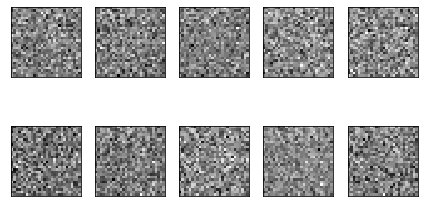



Εποχή: 1/100, Απώλεια Διευκρινιστή: 0.227, Απώλεια GAN: 5.399
Εποχή: 2/100, Απώλεια Διευκρινιστή: 0.229, Απώλεια GAN: 5.104
Εποχή: 3/100, Απώλεια Διευκρινιστή: 0.216, Απώλεια GAN: 4.694
Εποχή: 4/100, Απώλεια Διευκρινιστή: 0.263, Απώλεια GAN: 3.118
Εποχή: 5/100, Απώλεια Διευκρινιστή: 0.279, Απώλεια GAN: 2.979
Εποχή: 6/100, Απώλεια Διευκρινιστή: 0.310, Απώλεια GAN: 2.844
Εποχή: 7/100, Απώλεια Διευκρινιστή: 0.309, Απώλεια GAN: 2.626
Εποχή: 8/100, Απώλεια Διευκρινιστή: 0.299, Απώλεια GAN: 3.033
Εποχή: 9/100, Απώλεια Διευκρινιστή: 0.279, Απώλεια GAN: 2.542
Εποχή: 10/100, Απώλεια Διευκρινιστή: 0.352, Απώλεια GAN: 2.381


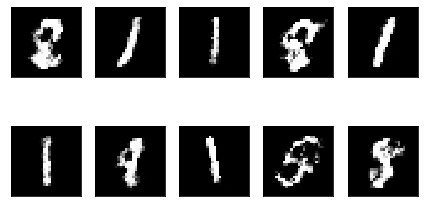

Εποχή: 11/100, Απώλεια Διευκρινιστή: 0.333, Απώλεια GAN: 2.154
Εποχή: 12/100, Απώλεια Διευκρινιστή: 0.311, Απώλεια GAN: 2.182
Εποχή: 13/100, Απώλεια Διευκρινιστή: 0.330, Απώλεια GAN: 2.268
Εποχή: 14/100, Απώλεια Διευκρινιστή: 0.374, Απώλεια GAN: 2.308
Εποχή: 15/100, Απώλεια Διευκρινιστή: 0.353, Απώλεια GAN: 2.267
Εποχή: 16/100, Απώλεια Διευκρινιστή: 0.343, Απώλεια GAN: 2.112
Εποχή: 17/100, Απώλεια Διευκρινιστή: 0.348, Απώλεια GAN: 2.120
Εποχή: 18/100, Απώλεια Διευκρινιστή: 0.396, Απώλεια GAN: 1.966
Εποχή: 19/100, Απώλεια Διευκρινιστή: 0.357, Απώλεια GAN: 1.996
Εποχή: 20/100, Απώλεια Διευκρινιστή: 0.342, Απώλεια GAN: 2.117


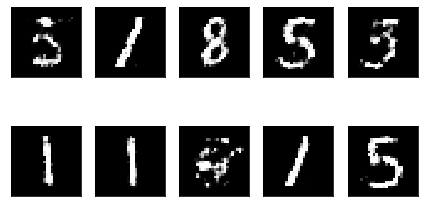

Εποχή: 21/100, Απώλεια Διευκρινιστή: 0.354, Απώλεια GAN: 1.996
Εποχή: 22/100, Απώλεια Διευκρινιστή: 0.422, Απώλεια GAN: 1.954
Εποχή: 23/100, Απώλεια Διευκρινιστή: 0.360, Απώλεια GAN: 1.928
Εποχή: 24/100, Απώλεια Διευκρινιστή: 0.361, Απώλεια GAN: 1.916
Εποχή: 25/100, Απώλεια Διευκρινιστή: 0.370, Απώλεια GAN: 1.879
Εποχή: 26/100, Απώλεια Διευκρινιστή: 0.390, Απώλεια GAN: 1.793
Εποχή: 27/100, Απώλεια Διευκρινιστή: 0.391, Απώλεια GAN: 1.875
Εποχή: 28/100, Απώλεια Διευκρινιστή: 0.371, Απώλεια GAN: 1.916
Εποχή: 29/100, Απώλεια Διευκρινιστή: 0.399, Απώλεια GAN: 1.839
Εποχή: 30/100, Απώλεια Διευκρινιστή: 0.392, Απώλεια GAN: 2.017


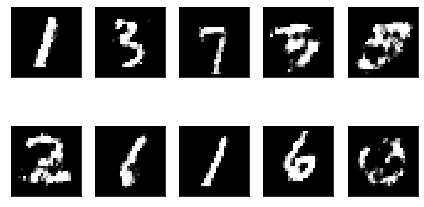

Εποχή: 31/100, Απώλεια Διευκρινιστή: 0.412, Απώλεια GAN: 1.815
Εποχή: 32/100, Απώλεια Διευκρινιστή: 0.389, Απώλεια GAN: 1.745
Εποχή: 33/100, Απώλεια Διευκρινιστή: 0.403, Απώλεια GAN: 1.878
Εποχή: 34/100, Απώλεια Διευκρινιστή: 0.384, Απώλεια GAN: 1.846
Εποχή: 35/100, Απώλεια Διευκρινιστή: 0.439, Απώλεια GAN: 1.823
Εποχή: 36/100, Απώλεια Διευκρινιστή: 0.438, Απώλεια GAN: 1.943
Εποχή: 37/100, Απώλεια Διευκρινιστή: 0.399, Απώλεια GAN: 1.814
Εποχή: 38/100, Απώλεια Διευκρινιστή: 0.415, Απώλεια GAN: 1.915
Εποχή: 39/100, Απώλεια Διευκρινιστή: 0.424, Απώλεια GAN: 2.082
Εποχή: 40/100, Απώλεια Διευκρινιστή: 0.418, Απώλεια GAN: 1.788


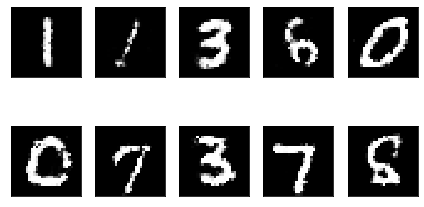

Εποχή: 41/100, Απώλεια Διευκρινιστή: 0.393, Απώλεια GAN: 1.955
Εποχή: 42/100, Απώλεια Διευκρινιστή: 0.419, Απώλεια GAN: 2.127
Εποχή: 43/100, Απώλεια Διευκρινιστή: 0.368, Απώλεια GAN: 2.063
Εποχή: 44/100, Απώλεια Διευκρινιστή: 0.445, Απώλεια GAN: 1.726
Εποχή: 45/100, Απώλεια Διευκρινιστή: 0.420, Απώλεια GAN: 1.852
Εποχή: 46/100, Απώλεια Διευκρινιστή: 0.385, Απώλεια GAN: 2.007
Εποχή: 47/100, Απώλεια Διευκρινιστή: 0.412, Απώλεια GAN: 1.938
Εποχή: 48/100, Απώλεια Διευκρινιστή: 0.456, Απώλεια GAN: 1.905
Εποχή: 49/100, Απώλεια Διευκρινιστή: 0.422, Απώλεια GAN: 1.816
Εποχή: 50/100, Απώλεια Διευκρινιστή: 0.430, Απώλεια GAN: 1.829


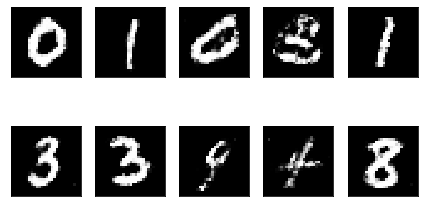

Εποχή: 51/100, Απώλεια Διευκρινιστή: 0.393, Απώλεια GAN: 1.933
Εποχή: 52/100, Απώλεια Διευκρινιστή: 0.430, Απώλεια GAN: 1.993
Εποχή: 53/100, Απώλεια Διευκρινιστή: 0.398, Απώλεια GAN: 1.878
Εποχή: 54/100, Απώλεια Διευκρινιστή: 0.419, Απώλεια GAN: 2.056
Εποχή: 55/100, Απώλεια Διευκρινιστή: 0.432, Απώλεια GAN: 1.865
Εποχή: 56/100, Απώλεια Διευκρινιστή: 0.414, Απώλεια GAN: 2.029
Εποχή: 57/100, Απώλεια Διευκρινιστή: 0.410, Απώλεια GAN: 1.931
Εποχή: 58/100, Απώλεια Διευκρινιστή: 0.426, Απώλεια GAN: 1.815
Εποχή: 59/100, Απώλεια Διευκρινιστή: 0.437, Απώλεια GAN: 1.947
Εποχή: 60/100, Απώλεια Διευκρινιστή: 0.457, Απώλεια GAN: 2.018


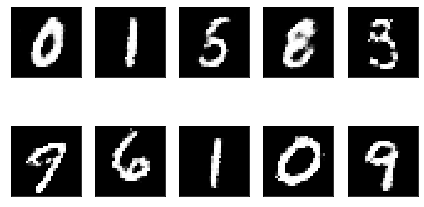

Εποχή: 61/100, Απώλεια Διευκρινιστή: 0.391, Απώλεια GAN: 2.119
Εποχή: 62/100, Απώλεια Διευκρινιστή: 0.391, Απώλεια GAN: 1.826
Εποχή: 63/100, Απώλεια Διευκρινιστή: 0.387, Απώλεια GAN: 1.895
Εποχή: 64/100, Απώλεια Διευκρινιστή: 0.422, Απώλεια GAN: 1.899
Εποχή: 65/100, Απώλεια Διευκρινιστή: 0.391, Απώλεια GAN: 1.883
Εποχή: 66/100, Απώλεια Διευκρινιστή: 0.373, Απώλεια GAN: 2.106
Εποχή: 67/100, Απώλεια Διευκρινιστή: 0.392, Απώλεια GAN: 1.874
Εποχή: 68/100, Απώλεια Διευκρινιστή: 0.389, Απώλεια GAN: 1.881
Εποχή: 69/100, Απώλεια Διευκρινιστή: 0.366, Απώλεια GAN: 2.142
Εποχή: 70/100, Απώλεια Διευκρινιστή: 0.397, Απώλεια GAN: 1.958


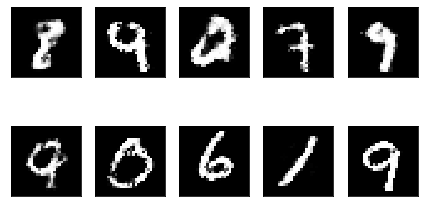

Εποχή: 71/100, Απώλεια Διευκρινιστή: 0.367, Απώλεια GAN: 1.829
Εποχή: 72/100, Απώλεια Διευκρινιστή: 0.400, Απώλεια GAN: 2.162
Εποχή: 73/100, Απώλεια Διευκρινιστή: 0.391, Απώλεια GAN: 1.891
Εποχή: 74/100, Απώλεια Διευκρινιστή: 0.380, Απώλεια GAN: 1.891
Εποχή: 75/100, Απώλεια Διευκρινιστή: 0.426, Απώλεια GAN: 1.810
Εποχή: 76/100, Απώλεια Διευκρινιστή: 0.414, Απώλεια GAN: 2.186
Εποχή: 77/100, Απώλεια Διευκρινιστή: 0.334, Απώλεια GAN: 1.991
Εποχή: 78/100, Απώλεια Διευκρινιστή: 0.385, Απώλεια GAN: 2.116
Εποχή: 79/100, Απώλεια Διευκρινιστή: 0.359, Απώλεια GAN: 2.202
Εποχή: 80/100, Απώλεια Διευκρινιστή: 0.390, Απώλεια GAN: 2.155


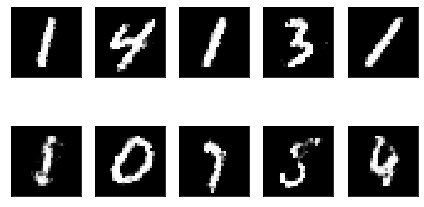

In [0]:
epochs = 100
batch_size = 64
smooth = 0.1

real = np.ones(shape=(batch_size, 1))
fake = np.zeros(shape=(batch_size, 1))

d_loss_gan = []
gan_loss = []

# Generate 10 samples prior to training the GAN
samples = 10
x_fake = generator.predict(
    np.random.normal(loc=0, scale=1, size=(samples, latent_dim))
)

for k in range(samples):
    plt.subplot(2, 5, k+1)
    plt.imshow(x_fake[k].reshape(28, 28), cmap='gray')
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()

for e in range(epochs):
    for i in range(len(X_train) // batch_size):
        
        # Train Discriminator weights
        discriminator.trainable = True
        
        # Real samples
        X_batch = X_train_scaled[i*batch_size:(i+1)*batch_size]
        d_loss_gan_real = discriminator.train_on_batch(
            x=X_batch, y=real * (1 - smooth)
        )
        
        # Fake Samples
        z = np.random.normal(loc=0, scale=1, size=(batch_size, latent_dim))
        X_fake = generator.predict_on_batch(z)
        d_loss_gan_fake = discriminator.train_on_batch(x=X_fake, y=fake)
         
        # Discriminator loss
        d_loss_gan_batch = 0.5 * (d_loss_gan_real[0] + d_loss_gan_fake[0])
        
        # Train Generator weights
        discriminator.trainable = False
        gan_loss_batch = gan.train_on_batch(x=z, y=real)
   

    d_loss_gan.append(d_loss_gan_batch)
    gan_loss.append(gan_loss_batch[0])
    print('Εποχή: %d/%d, Απώλεια Διευκρινιστή: %.3f, Απώλεια GAN: %.3f' % 
          (e + 1, epochs, d_loss_gan[-1], gan_loss[-1]))

    if (e + 1) % 10 == 0:
        samples = 10
        x_fake = generator.predict(
            np.random.normal(loc=0, scale=1, size=(samples, latent_dim))
        )

        for k in range(samples):
            plt.subplot(2, 5, k+1)
            plt.imshow(x_fake[k].reshape(28, 28), cmap='gray')
            plt.xticks([])
            plt.yticks([])

        plt.tight_layout()
        plt.show()



Τέλος, ας σχεδιάσουμε τη μεταβολή των συναρτήσεων απώλειας για τον διευκρινιστή καθώς και για το συνολικό δίκτυο

In [0]:
# plotting the metrics
plt.plot(d_loss_gan)
plt.plot(gan_loss)
plt.title('Απώλεια Μοντέλων')
plt.ylabel('Απώλεια')
plt.xlabel('Εποχή')
plt.legend(['Διευκρινιστής', 'GAN'], loc='upper right')
plt.show()

Παρατηρούμε ότι οι συναρτήσεις απώλειας του διευκρινιστή και του GAN σταθεροποιούνται μετά την 40ή εποχή.

## Wasserstein GAN

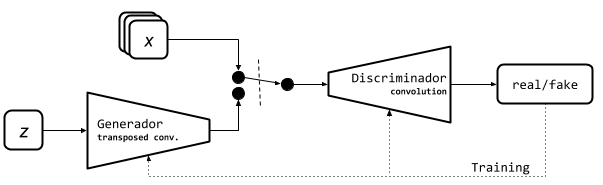

Το [Wasserstein GAN](https://arxiv.org/abs/1701.07875) εισάγει μια νέα συνάρτηση κόστους, η οποία παράγει πιο ομαλές κλίσεις. Βασίζεται στη μέτρηση της διαφοράς μεταξύ των κατανομών των κανονικών δεδομένων και αυτών που παράγονται από τον γεννήτορα

In [0]:
# Wasserstein objective
def wasserstein_loss(y_true, y_pred):
    return K.mean(y_true * y_pred)

Το μέγεθος του λανθάνοντα χώρου $z$ παραμένει το ίδιο ($100$)

In [0]:
img_shape=(28,28,1)
latent_dim=100

Επειδή όμως πρόκειται να χρησιμοποιήσουμε συνελικτικά δίκτυα σε αυτή την περίπτωση μετασχηματίζουμε τις εικόνες του dataset μας από διανύσματα $784$ χαρακτηριστικών σε εικόνες $28\times 28$ pixels ενός καναλιού (ασπρόμαυρες) και τις απεικονίζουμε στο $[-1,1]$ (αντί του $[0,1]$ της προηγούμενης περίπτωσης)

In [0]:

X_train = X_train.reshape(60000, 28*28)
# normalizing the inputs
scaler = MinMaxScaler(feature_range=(-1,1))

X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = X_train_scaled.reshape(X_train.shape[0], 28, 28, 1)


Κατά τα λοιπά, το συγκεκριμένό δίκτυο είναι όμοιο με τα απλά GANs, με τη διαφορά ότι η συνάρτηση ενεργοποίησης του επιπέδου της εξόδου δεν είναι η σιγμοειδής αλλά η  γραμμική. Συνεπώς, στην έξοδο του ο διευκρινιστής δεν παράγει μια πιθανότητα στο $[0,1]$ αλλά ένα βαθμωτό (scalar) μέγεθος, για αυτό και μετονομάζεται σε κριτή (critic)

In [0]:
critic = Sequential([
    # Conv 1
    Conv2D(64, kernel_size=3, strides=2, padding='same', 
           input_shape=(img_shape)),
    LeakyReLU(0.2),
    
    # Conv 2
    Conv2D(128, kernel_size=3, strides=2, padding='same'),
    BatchNormalization(momentum=0.8),
    LeakyReLU(0.2),
    
    # Conv 3
    Conv2D(256, kernel_size=3, strides=2, padding='same'),
    BatchNormalization(momentum=0.8),
    LeakyReLU(0.2),
    
    # Conv 4
    Conv2D(512, kernel_size=3, strides=1, padding='same'),
    BatchNormalization(momentum=0.8),
    LeakyReLU(0.2),
    
    # FC
    Flatten(),
    
    # Output
    Dense(1)
])

# print a summary of the model
critic.summary()

Ορίζουμε το δίκτυο του γεννήτορα

In [0]:
# Generator network
w_generator = Sequential([
    # FC
    Dense(7*7*512, input_shape=(latent_dim,), 
          kernel_initializer=RandomNormal(stddev=0.02)),
    Reshape((7,7, 512)),
    
    # Conv 1
    Conv2DTranspose(128, kernel_size=3, strides=2, padding='same'),
    BatchNormalization(momentum=0.8),
    ReLU(0.2),
    
    # Conv 2
    Conv2DTranspose(64, kernel_size=3, strides=1, padding='same'),
    BatchNormalization(momentum=0.8),
    ReLU(0.2),
    
    # Output
    Conv2DTranspose(1, kernel_size=3, strides=2, padding='same', 
                    activation='tanh')
])


# print a summary of the model
w_generator.summary()

"Κουρεύουμε" (clip) τις τιμές των βαρών, σύμφωνα και με τα όσα προβλέπονται στο [σχετικό paper](https://arxiv.org/abs/1701.07875)

In [0]:
# Following parameter and optimizer set as recommended in paper
n_critic = 5
clip_value = 0.01

critic.compile(optimizer=RMSprop(lr=5e-5), loss=wasserstein_loss, 
               metrics=['accuracy'])

critic.trainable = False

Τέλος, ορίζουμε το συνολικό GAN

In [0]:
w_gan = Sequential([
    w_generator,
    critic
])

# print a summary of the model
w_gan.summary()

w_gan.compile(optimizer=RMSprop(lr=5e-5), loss=wasserstein_loss, 
              metrics=['accuracy'])

In [0]:
epochs = 50
batch_size = 64

real = -np.ones(shape=(batch_size, 1))
fake = np.ones(shape=(batch_size, 1))

c_loss = []
wgan_loss = []

# Generate 10 samples prior to training the GAN
samples = 10
x_fake = w_generator.predict(
    np.random.normal(loc=0, scale=1, size=(samples, latent_dim))
)

for k in range(samples):
    plt.subplot(2, 5, k+1)
    plt.imshow(x_fake[k].reshape(28, 28), cmap='gray')
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()


for e in range(epochs):
    for i in range(len(X_train) // batch_size):
        for _ in range(n_critic):

            # Train Discriminator weights            
            critic.trainable = True

            # Real samples
            X_batch = X_train_scaled[i*batch_size:(i+1)*batch_size]
            c_loss_real = critic.train_on_batch(x=X_batch, y=real)

            # Fake Samples
            z = np.random.normal(loc=0, scale=1, size=(batch_size, latent_dim))
            X_fake = w_generator.predict(z)
            c_loss_fake = critic.train_on_batch(x=X_fake, y=fake)

            # Discriminator loss
            c_loss_batch = 0.5 * (c_loss_real[0] + c_loss_fake[0])

            # Clip critic weights
            for l in critic.layers:
                weights = l.get_weights()
                weights = [np.clip(w, -clip_value, clip_value) for w in weights]
                l.set_weights(weights)

        # Train Generator weights
        critic.trainable = False
        wgan_loss_batch = w_gan.train_on_batch(x=z, y=real)

    
    c_loss.append(c_loss_batch)
    wgan_loss.append(wgan_loss_batch[0])
    print('Εποχή: %d/%d, Απώλεια Κριτή: %.3f, Απώλεια Wasserstein GAN: %.3f' % 
          (e + 1, epochs, c_loss[-1], wgan_loss[-1]))

    if (e + 1) % 10 == 0:
        samples = 10
        x_fake = w_generator.predict(
            np.random.normal(loc=0, scale=1, size=(samples, latent_dim))
        )

        for k in range(samples):
            plt.subplot(2, 5, k+1)
            plt.imshow(x_fake[k].reshape(28, 28), cmap='gray')
            plt.xticks([])
            plt.yticks([])

        plt.tight_layout()
        plt.show()

Όσον αφορά την εκπαίδευση του κριτή θέλουμε να μεγιστοποιήσουμε την ορθή ταξινόμηση των πραγματικών δεδομένων $\underset{w}{max} \: \frac{1}{m} \sum\limits_{i=1}^{m} f(x^{(i)})$ και να ελαχιστοποιήσουμε τη λάθος ταξινόμηση των παραγόμενων δεδομένων $\underset{w}{min} \: \frac{1}{m} \sum\limits_{i=1}^{m} f\left(G(z^{(i)})\right)$.

Όσον αφορά την εκπαίδευση του γεννήτορα, θέλουμε να μεγιστοποιήσουμε το σφάλμα του κριτή $\underset{w}{max} \: \frac{1}{m} \sum\limits_{i=1}^{m} f\left(G(z^{(i)})\right)$.

Τέλος, σχεδιάζουμε τη μεταβολή των συναρτήσεων απώλειας για το δίκτυο του κριτή  καθώς και για το συνολικό Wasserstein GAN.

In [0]:
# plotting the metrics
plt.plot(c_loss)
plt.plot(wgan_loss)
plt.title('Απώλεια Μοντέλων')
plt.ylabel('Απώλεια')
plt.xlabel('Εποχή')
plt.legend(['Κριτής', 'Wasserstein GAN'], loc='upper right')
plt.show()

Παρότι η εκπαίδευση του συγκεκριμένου δικτύου παίρνει περισσότερο χρόνο, ωστόσο παρατηρούμε ότι οι συναρτήσεις απώλειας του κριτή και του Wasserstein GAN σταθεροποιούνται πιο γρήγορα (10η εποχή) σε σύγκριση με το απλό GAN. Ωστόσο, η ποιότητα των ψηφίων που παίρνουμε δεν είναι καλή.

## (Προαιρετική) Άσκηση

Μεταβάλετε τα στοιχεία της αρχιτεκτονικής του Wasserstein GAN προκειμένου αυτό να παράγει ψηφία περισσότερο "όμοια" με την ανθρώπινη γραφή;